In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
from typing import List, Dict, Any, Tuple
import pickle
import torch
# from utilsHannes import mean_pointwise_l2_distance

def mean_pointwise_l2_distance(lattice: torch.Tensor, ground_truth: torch.Tensor) -> torch.Tensor:
    """
    Computes the index of the closest trajectory in the lattice as measured by l1 distance.
    :param lattice: Lattice of pre-generated trajectories. Shape [num_modes, n_timesteps, state_dim]
    :param ground_truth: Ground truth trajectory of agent. Shape [1, n_timesteps, state_dim].
    :return: Index of closest mode in the lattice.
    """
    stacked_ground_truth = ground_truth.repeat(lattice.shape[0], 1, 1)
    return torch.pow(lattice - stacked_ground_truth, 2).sum(dim=2).sqrt().mean(dim=1).argmin()


In [2]:
### IID - Balanced
# folder_path = "saveResults/from_other_servers/FedOptimizer_8clients_IID_800Rounds"
# fed_optimizer_list = ["FedAvg","FedAvgM","FedProx"]
# file_suffix_list = [f"iid_balanced_C=8_Cf=1.0_Ef=1.0_B=8_E=1_R=800_Opt={fed_optimizer}_Lr=0.0001" for fed_optimizer in fed_optimizer_list]
# legend_list = [f'{fed_optimizer}' for fed_optimizer in fed_optimizer_list]
# num_epochs = 800

### Non-IID - Balanced
# folder_path = "saveResults/from_other_servers/ClientNumber_non-IID"
# num_clients_list = ['1','2','4','8']
# file_suffix_list = [f"balanced_C={num_clients}_Cf=1.0_Ef=1.0_B=8_E=1_R=500_Opt=saveFedAvg_Lr=0.0001" for num_clients in num_clients_list]
# legend_list = [f'{num_clients}' for num_clients in num_clients_list]
# num_epochs = 500

# folder_path = "saveResults/from_other_servers/ClientFraction_non-IID"
# client_fraction_list = ['0.25','0.5','0.75','1.0']
# file_suffix_list = [f"balanced_C=8_Cf={client_fraction}_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_fraction in client_fraction_list]
# legend_list = [f'{client_fraction}' for client_fraction in client_fraction_list]
# num_epochs = 1000

## Load lattice
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_8.pkl', 'rb') as f:
    trajectories8 = pickle.load(f)
lattice8 = np.array(trajectories8)
              
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_4.pkl', 'rb') as f:
    trajectories4 = pickle.load(f)
lattice4 = np.array(trajectories4)
    
with open('data/sets/nuscenes-prediction-challenge-trajectory-sets/epsilon_2.pkl', 'rb') as f:
    trajectories2 = pickle.load(f)
lattice2 = np.array(trajectories2)

dataset_factor_list = [1,1,1,1,1,1,1,1,1,1]
lattice_list = [lattice4,lattice4,lattice4,lattice4,lattice4,lattice4,lattice4,lattice4,lattice4,lattice4]
modes_list = [415,415,415,415,415,415,415,415,415,415]

batch_size_list = ['4','8','16','32']
client_fraction_list = ['0.25','0.5','0.75','1.0']
client_number_list = ['1','2','4','8']
fed_optimizer_list = ['FedAvg','FedAvgM','FedProx']
learning_rate_list = ['1e-05','5e-05','0.0001','0.0005']

In [3]:
############################# Modified logits CL ######################################

######## FILES ########

# ##### IID - Balanced
# folder = "IID_balanced/BatchSize_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C=2_Cf=1.0_Ef=1.0_B={batch_size}_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for batch_size in batch_size_list]
# legend_list = [f'$B$ = {batch_size}' for batch_size in batch_size_list]
# num_epochs = 1000

# folder = "IID_balanced/ClientFraction_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C=8_Cf={client_fraction}_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_fraction in client_fraction_list]
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in client_fraction_list]
# num_epochs = 1000

# folder = "IID_balanced/ClientNumber_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C={client_number}_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_number in client_number_list]
# legend_list = [f'$C$ = {client_number}' for client_number in client_number_list]
# num_epochs = 1000

# folder = "IID_balanced/FedOptimizer_2clients_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C=2_Cf=1.0_Ef=1.0_B=8_E=1_R=500_Opt={fed_optimizer}_Lr=0.0001" for fed_optimizer in fed_optimizer_list]
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in fed_optimizer_list]
# num_epochs = 500

# folder = "IID_balanced/FedOptimizer_8clients_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C=8_Cf=1.0_Ef=1.0_B=8_E=1_R=800_Opt={fed_optimizer}_Lr=0.0001" for fed_optimizer in fed_optimizer_list]
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in fed_optimizer_list]
# num_epochs = 800

# folder = "IID_balanced/LearningRate_IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_balanced_C=2_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=saveFedAvg_Lr={learning_rate}" for learning_rate in learning_rate_list]
# legend_list = [f'$L_r$ = {learning_rate}' for learning_rate in ['1e-5','5e-5','1e-4','5e-4']]
# num_epochs = 1000


##### IID - Non-Balanced
# folder = "IID_non-balanced/ClientFraction_IID_non-balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_C=8_Cf={client_fraction}_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_fraction in client_fraction_list]
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in client_fraction_list]
# num_epochs = 1000

# folder = "IID_non-balanced/ClientNumber_IID_non-balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"iid_C={client_number}_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_number in client_number_list]
# legend_list = [f'$C$ = {client_number}' for client_number in client_number_list]
# num_epochs = 1000


##### Non-IID - Balanced
# folder = "non-IID_balanced/ClientFraction_non-IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"balanced_C=8_Cf={client_fraction}_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_fraction in client_fraction_list]
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in client_fraction_list]
# num_epochs = 1000

# folder = "non-IID_balanced/ClientNumber_non-IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"balanced_C={client_number}_Cf=1.0_Ef=1.0_B=8_E=1_R=500_Opt=saveFedAvg_Lr=0.0001" for client_number in client_number_list]
# # file_suffix_list.append(f"balanced_C=8_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=saveFedAvg_Lr=0.0001")
# legend_list = [f'$C$ = {client_number}' for client_number in client_number_list]
# # legend_list.append("C = 8, 1000 rounds")
# num_epochs = 500 #500 all but 8

# folder = "non-IID_balanced/FedOptimizer_2clients_non-IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"balanced_C=2_Cf=1.0_Ef=1.0_B=8_E=1_R=500_Opt={fed_optimizer}_Lr=0.0001" for fed_optimizer in fed_optimizer_list]
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in fed_optimizer_list]
# num_epochs = 500

# folder = "non-IID_balanced/FedOptimizer_8clients_non-IID_balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"balanced_C=8_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt={fed_optimizer}_Lr=0.0001" for fed_optimizer in fed_optimizer_list]
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in fed_optimizer_list]
# num_epochs = 1000


##### Non-IID - Non-Balanced
# folder = "non-IID_non-balanced/ClientFraction_non-IID_non-balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"C=8_Cf={client_fraction}_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_fraction in client_fraction_list]
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in client_fraction_list]
# num_epochs = 1000

# folder = "non-IID_non-balanced/ClientNumber_non-IID_non-balanced"
# folder_path = f"saveResults/RealResults/{folder}"
# file_suffix_list = [f"C={client_number}_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for client_number in client_number_list[1:]]
# file_suffix_list.insert(0, "iid_C=1_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001")
# legend_list = [f'$C$ = {client_number}' for client_number in client_number_list]
# num_epochs = 1000



# Koen sanity
koen_list = ['bostonOnly_iid_balanced_C=1','singaporeOnly_iid_balanced_C=1','bostonAndSingapore_balanced_C=1','C=2']
folder = "sanity_check_Koen"
folder_path = f"saveResults/RealResults/{folder}"
file_suffix_list = [f"{koen}_Cf=1.0_Ef=1.0_B=8_E=1_R=1000_Opt=FedAvg_Lr=0.0001" for koen in koen_list]
legend_list = [f'data = {koen}' for koen in koen_list]
num_epochs = 1000


# Settings
file_number = 0
train_boolean = 'no' # yes
num_files = len(file_suffix_list)

indices_loaded_list = [(np.load(f'{folder_path}/val_indices_{file_path}.npy'))[:num_epochs*512*dataset_factor] for file_path, dataset_factor in zip(file_suffix_list, dataset_factor_list)]
probabilities_list = [(np.load(f'{folder_path}/val_probabilities_{file_path}.npy'))[:num_epochs*512*dataset_factor] for file_path, dataset_factor in zip(file_suffix_list, dataset_factor_list)]
ground_truth_loaded_list = [(np.load(f'{folder_path}/val_ground_truth_{file_path}.npy'))[:num_epochs*512*dataset_factor] for file_path, dataset_factor in zip(file_suffix_list, dataset_factor_list)]

#################################################################################################################################


# Print the data
print(f"len(indices_loaded_list) = {len(indices_loaded_list)}")
print(f"len(probabilities_list) = {len(probabilities_list)}")
print(f"len(ground_truth_loaded_list) = {len(ground_truth_loaded_list)}")
print(f"indices_loaded_list[{file_number}].shape = {indices_loaded_list[file_number].shape}")
print(f"probabilities_list[{file_number}].shape = {probabilities_list[file_number].shape}")
print(f"ground_truth_loaded_list[{file_number}].shape = {ground_truth_loaded_list[file_number].shape}")


len(indices_loaded_list) = 4
len(probabilities_list) = 4
len(ground_truth_loaded_list) = 4
indices_loaded_list[0].shape = (512000, 15)
probabilities_list[0].shape = (512000, 15)
ground_truth_loaded_list[0].shape = (512000, 12, 2)


In [4]:
## Functions new

def get_sorted_most_likely_trajectories(sortedProbabilitiesIndices: np.ndarray, lattice: np.ndarray): # -> Tuple[np.ndarray, np.ndarray]:
    
    sortedTrajectories = lattice[sortedProbabilitiesIndices]
    
    return sortedTrajectories

### ADE ###
def get_ADE_for_k_trajectories(sorted_predicted_trajectories, ground_truth_trajectories, k_nr_of_trajectories, train_boolean, dataset_factor): # -> Tuple[np.array, np.array]:
    
    top_k_trajectories = sorted_predicted_trajectories[:,:k_nr_of_trajectories,:,:]
    
    n_epochs = num_epochs # TODO, automate
    if train_boolean == 'yes':
        n_datapoints_per_epoch = 2048*dataset_factor # TODO, automate
    else:
        n_datapoints_per_epoch = 512*dataset_factor # TODO, automate
    
    ave_ADE = np.zeros([n_datapoints_per_epoch, n_epochs])
    min_ADE = np.zeros([n_datapoints_per_epoch, n_epochs])
    count = 0
    # Loop over epochs
    for e in range(n_epochs):
        # Loop over datapoints
        for d in range(n_datapoints_per_epoch):
            tmp_ADE = 1e10
            min_ADE[d,e] = tmp_ADE
            # Loop over each trajectory
            for k in range(k_nr_of_trajectories):
                tmp_ADE = np.mean(np.linalg.norm(top_k_trajectories[count,k,:,:] - ground_truth_trajectories[count,:,:], axis=-1))
                ave_ADE[d,e] += tmp_ADE/k_nr_of_trajectories
                if tmp_ADE < min_ADE[d,e]:
                    min_ADE[d,e] = tmp_ADE
            count += 1
            
    return np.mean(min_ADE, axis=0), np.mean(ave_ADE, axis=0)


### FDE ###
def get_FDE_for_k_trajectories(sorted_predicted_trajectories, ground_truth_trajectories, k_nr_of_trajectories, train_boolean, dataset_factor): # -> Tuple[np.array, np.array]:
    
    top_k_trajectories = sorted_predicted_trajectories[:,:k_nr_of_trajectories,:,:]
    
    n_epochs = num_epochs # TODO, automate
    if train_boolean == 'yes':
        n_datapoints_per_epoch = 2048*dataset_factor # TODO, automate
    else:
        n_datapoints_per_epoch = 512*dataset_factor # TODO, automate
    
    ave_FDE = np.zeros([n_datapoints_per_epoch, n_epochs])
    min_FDE = np.zeros([n_datapoints_per_epoch, n_epochs])
    count = 0
    # Loop over epochs
    for e in range(n_epochs):
        
        # Loop over datapoints
        for d in range(n_datapoints_per_epoch):
            tmp_FDE = 1e10
            min_FDE[d,e] = tmp_FDE
            # Loop over each trajectory
            for k in range(k_nr_of_trajectories):
                tmp_FDE = np.mean(np.linalg.norm(top_k_trajectories[count,k,-1,:] - ground_truth_trajectories[count,-1,:], axis=-1))
                ave_FDE[d,e] += tmp_FDE/k_nr_of_trajectories
                if tmp_FDE < min_FDE[d,e]:
                    min_FDE[d,e] = tmp_FDE
            count += 1
            
    return np.mean(min_FDE, axis=0), np.mean(ave_FDE, axis=0)


### Hit rate ###
def get_hit_rate_for_k_trajectories(sorted_predicted_trajectories, ground_truth_trajectories, k_nr_of_trajectories, max_distance, train_boolean, dataset_factor): # -> Tuple[np.array, np.array]:
    
    top_k_trajectories = sorted_predicted_trajectories[:,:k_nr_of_trajectories,:,:]
    
    n_epochs = num_epochs # TODO, automate
    if train_boolean == 'yes':
        n_datapoints_per_epoch = 2048*dataset_factor # TODO, automate
    else:
        n_datapoints_per_epoch = 512*dataset_factor # TODO, automate
    
    ave_MDE = np.zeros([n_datapoints_per_epoch, n_epochs])
    min_MDE = np.zeros([n_datapoints_per_epoch, n_epochs])
    hit_matrix = np.zeros([n_datapoints_per_epoch, n_epochs])
    count = 0
    # Loop over epochs
    for e in range(n_epochs):
        # Loop over datapoints
        for d in range(n_datapoints_per_epoch):
            tmp_MDE = 1e10
            min_MDE[d,e] = tmp_MDE
            real_ground_truth = ground_truth_trajectories[count,:,:]
            # # For lattice ground truth
            # closest_lattice_index = mean_pointwise_l2_distance(torch.Tensor(lattice4), torch.Tensor(real_ground_truth))
            # ground_truth_trajectory_from_lattice = lattice4[closest_lattice_index,:,:]

            # Loop over each trajectory
            for k in range(k_nr_of_trajectories):
                # Find max in sequence
                tmp_MDE = np.amax(np.linalg.norm(top_k_trajectories[count,k,:,:] - real_ground_truth, axis=-1))
                ave_MDE[d,e] += tmp_MDE/k_nr_of_trajectories
                if tmp_MDE < min_MDE[d,e]:
                    min_MDE[d,e] = tmp_MDE
            count += 1

            # Hit if distance less than max_distance
            if min_MDE[d,e] < max_distance:
                hit_matrix[d,e] = 1
    
    
    return np.mean(min_MDE, axis=0), np.mean(ave_MDE, axis=0), np.mean(hit_matrix, axis=0)



In [5]:
############### Calculate and plot many files

# Settings
k_nr_of_trajectories_many_files_ADE = 5 # 1, 5, 15
k_nr_of_trajectories_many_files_FDE = 1 # 1
k_nr_of_trajectories_many_files_MDE = 5 # 5
max_distance = 2 # 2, 4

# New
sorted_predicted_trajectories_list = [get_sorted_most_likely_trajectories(indices_loaded, lattice) for indices_loaded, lattice in zip(indices_loaded_list, lattice_list)]
sorted_predicted_probabilities_list = probabilities_list.copy()

# General
print(f"len(sorted_predicted_probabilities_list) = {len(sorted_predicted_probabilities_list)}")
print(f"len(sorted_predicted_trajectories_list) = {len(sorted_predicted_trajectories_list)}")
print(f"len(ground_truth_loaded_list) = {len(ground_truth_loaded_list)}")
print(f"len(dataset_factor_list) = {len(dataset_factor_list)}")
print(f"sorted_predicted_probabilities_list[{file_number}].shape = {sorted_predicted_probabilities_list[file_number].shape}")
print(f"sorted_predicted_trajectories_list[{file_number}].shape = {sorted_predicted_trajectories_list[file_number].shape}")
# print(f"sortedTrajectories = {sorted_predicted_trajectories_list[0][2]}") # [0][0/1] and [0][2/3] the same


# ADE
results2 = [get_ADE_for_k_trajectories(sorted_predicted_trajectories, ground_truth_loaded, k_nr_of_trajectories_many_files_ADE, train_boolean, dataset_factor) for sorted_predicted_trajectories, ground_truth_loaded, dataset_factor in zip(sorted_predicted_trajectories_list, ground_truth_loaded_list, dataset_factor_list)]
min_ADE_list, ave_ADE_list = zip(*results2)
np.save(f'saveResults/processed_RealResults/{folder}/min_ADE_list_k={k_nr_of_trajectories_many_files_ADE}.npy', min_ADE_list)
np.save(f'saveResults/processed_RealResults/{folder}/ave_ADE_list_k={k_nr_of_trajectories_many_files_ADE}.npy', ave_ADE_list)


# FDE
results3 = [get_FDE_for_k_trajectories(sorted_predicted_trajectories, ground_truth_loaded, k_nr_of_trajectories_many_files_FDE, train_boolean, dataset_factor) for sorted_predicted_trajectories, ground_truth_loaded, dataset_factor in zip(sorted_predicted_trajectories_list, ground_truth_loaded_list, dataset_factor_list)]
min_FDE_list, ave_FDE_list = zip(*results3)
np.save(f'saveResults/processed_RealResults/{folder}/min_FDE_list_k={k_nr_of_trajectories_many_files_FDE}.npy', min_FDE_list)
np.save(f'saveResults/processed_RealResults/{folder}/ave_FDE_list_k={k_nr_of_trajectories_many_files_FDE}.npy', ave_FDE_list)


# MDE Hit rate
results4 = [get_hit_rate_for_k_trajectories(sorted_predicted_trajectories, ground_truth_loaded, k_nr_of_trajectories_many_files_MDE, max_distance, train_boolean, dataset_factor) for sorted_predicted_trajectories, ground_truth_loaded, dataset_factor in zip(sorted_predicted_trajectories_list, ground_truth_loaded_list, dataset_factor_list)]
min_MDE_list, ave_MDE_list, min_hit_rate_list = zip(*results4)
np.save(f'saveResults/processed_RealResults/{folder}/min_MDE_list_k={k_nr_of_trajectories_many_files_MDE}.npy', min_MDE_list)
np.save(f'saveResults/processed_RealResults/{folder}/ave_MDE_list_k={k_nr_of_trajectories_many_files_MDE}.npy', ave_MDE_list)
np.save(f'saveResults/processed_RealResults/{folder}/min_hit_rate_list_k={k_nr_of_trajectories_many_files_MDE}_d={max_distance}.npy', min_hit_rate_list)



# ADE
print(f"\nmin_ADE_list[{file_number}].shape = {min_ADE_list[file_number].shape}")
print(f"\nave_ADE_list[{file_number}].shape = {ave_ADE_list[file_number].shape}")
print(f"\nmin_ADE_list[{file_number}][-1] = {min_ADE_list[file_number][-1]}")
print(f"\nave_ADE_list[{file_number}][-1] = {ave_ADE_list[file_number][-1]}")

# FDE
print(f"\nmin_FDE_list[{file_number}].shape = {min_FDE_list[file_number].shape}")
print(f"\nave_FDE_list[{file_number}].shape = {ave_FDE_list[file_number].shape}")
print(f"\nmin_FDE_list[{file_number}][-1] = {min_FDE_list[file_number][-1]}")
print(f"\nave_FDE_list[{file_number}][-1] = {ave_FDE_list[file_number][-1]}")

# MDE - hit rate
print(f"\nmin_MDE_list[{file_number}].shape = {min_MDE_list[file_number].shape}")
print(f"\nave_MDE_list[{file_number}].shape = {ave_MDE_list[file_number].shape}")
print(f"\min_hit_rate_list[{file_number}].shape = {min_hit_rate_list[file_number].shape}")
print(f"\nmin_MDE_list[{file_number}][-1] = {min_MDE_list[file_number][-1]}")
print(f"\nave_MDE_list[{file_number}][-1] = {ave_MDE_list[file_number][-1]}")
print(f"\nmin_hit_rate_list[{file_number}][-1] = {min_hit_rate_list[file_number][-1]}")


len(sorted_predicted_probabilities_list) = 4
len(sorted_predicted_trajectories_list) = 4
len(ground_truth_loaded_list) = 4
len(dataset_factor_list) = 10
sorted_predicted_probabilities_list[0].shape = (512000, 15)
sorted_predicted_trajectories_list[0].shape = (512000, 15, 12, 2)

min_ADE_list[0].shape = (1000,)

ave_ADE_list[0].shape = (1000,)

min_ADE_list[0][-1] = 3.663700885656637

ave_ADE_list[0][-1] = 9.030209598581978

min_FDE_list[0].shape = (1000,)

ave_FDE_list[0].shape = (1000,)

min_FDE_list[0][-1] = 17.15339735418458

ave_FDE_list[0][-1] = 17.15339735418458

min_MDE_list[0].shape = (1000,)

ave_MDE_list[0].shape = (1000,)
\min_hit_rate_list[0].shape = (1000,)

min_MDE_list[0][-1] = 8.047406209589951

ave_MDE_list[0][-1] = 19.725708062734924

min_hit_rate_list[0][-1] = 0.06640625


FileNotFoundError: [Errno 2] No such file or directory: 'saveResults/plots/sanity_check_Koen/koen_sanity_minADE_k=5.png'

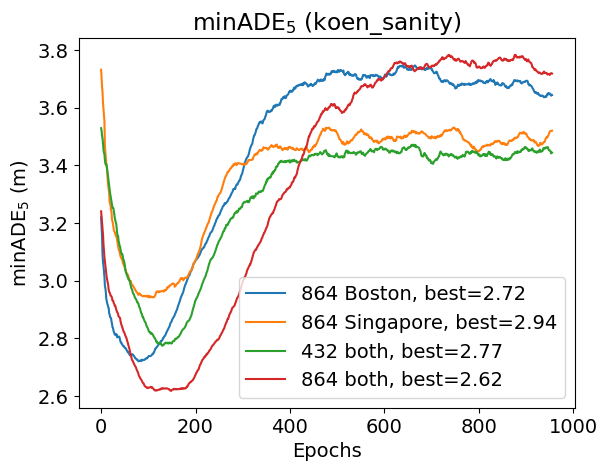

In [6]:
############### Load files #######################
import numpy as np
import matplotlib.pyplot as plt

# Settings
k_nr_of_trajectories_many_files_ADE = 5 # 1, 5, 15
k_nr_of_trajectories_many_files_FDE = 1 # 1
k_nr_of_trajectories_many_files_MDE = 5 # 5
max_distance = 2 # 2, 4


########## IID - balanced
# folder = "IID_balanced/BatchSize_IID_balanced"
# legend_list = [f'$B$ = {batch_size}' for batch_size in ['4','8','16','32']]
# folder = "IID_balanced/ClientFraction_IID_balanced"
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]
# folder = "IID_balanced/ClientNumber_IID_balanced"
# legend_list = [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]
# folder = "IID_balanced/FedOptimizer_2clients_IID_balanced"
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]
# folder = "IID_balanced/FedOptimizer_8clients_IID_balanced"
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]
# folder = "IID_balanced/LearningRate_IID_balanced"
# legend_list = [f'$L_r$ = {learning_rate}' for learning_rate in ['1e-5','5e-5','1e-4','5e-4']]

########## IID - non-balanced
# folder = "IID_non-balanced/ClientFraction_IID_non-balanced"
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]
# folder = "IID_non-balanced/ClientNumber_IID_non-balanced"
# legend_list = [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]

########## non-IID - balanced
# folder = "non-IID_balanced/ClientFraction_non-IID_balanced"
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]
# folder = "non-IID_balanced/ClientNumber_non-IID_balanced"
# legend_list = [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]
# folder = "non-IID_balanced/FedOptimizer_2clients_non-IID_balanced"
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]
# folder = "non-IID_balanced/FedOptimizer_8clients_non-IID_balanced"
# legend_list = [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]

########## non-IID - non-balanced
# folder = "non-IID_non-balanced/ClientFraction_non-IID_non-balanced"
# legend_list = [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]
# folder = "non-IID_non-balanced/ClientNumber_non-IID_non-balanced"
# legend_list = [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]

# folders = [
#     ("IID_balanced/BatchSize_IID_balanced", [f'$B$ = {batch_size}' for batch_size in ['4','8','16','32']]),
#     ("IID_balanced/ClientFraction_IID_balanced", [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]),
#     ("IID_balanced/ClientNumber_IID_balanced", [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]),
#     ("IID_balanced/FedOptimizer_2clients_IID_balanced", [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]),
#     ("IID_balanced/FedOptimizer_8clients_IID_balanced", [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]),
#     ("IID_balanced/LearningRate_IID_balanced", [f'$L_r$ = {learning_rate}' for learning_rate in ['1e-5','5e-5','1e-4','5e-4']]),
#     ("IID_non-balanced/ClientFraction_IID_non-balanced", [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]),
#     ("IID_non-balanced/ClientNumber_IID_non-balanced", [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]),
#     ("non-IID_balanced/ClientFraction_non-IID_balanced", [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]),
#     ("non-IID_balanced/ClientNumber_non-IID_balanced", [f'$C$ = {client_number}' for client_number in ['1','2','4','8']]),
#     ("non-IID_balanced/FedOptimizer_2clients_non-IID_balanced", [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]),
#     ("non-IID_balanced/FedOptimizer_8clients_non-IID_balanced", [f'Optimizer = {fed_optimizer}' for fed_optimizer in ['FedAvg','FedAvgM','FedProx']]),
#     ("non-IID_non-balanced/ClientFraction_non-IID_non-balanced", [f'$F_C$ = {client_fraction}' for client_fraction in ['0.25','0.5','0.75','1.0']]),
#     ("non-IID_non-balanced/ClientNumber_non-IID_non-balanced", [f'$C$ = {client_number}' for client_number in ['1','2','4','8']])
# ]

# # Iterate over folders and legend lists
folder = 'sanity_check_Koen'
folder_name = "koen_sanity"
legend_list = ['864 Boston','864 Singapore','432 both','864 both']

#### Load files
min_ADE_list = np.load(f'saveResults/processed_RealResults/{folder}/min_ADE_list_k={k_nr_of_trajectories_many_files_ADE}.npy')
ave_ADE_list = np.load(f'saveResults/processed_RealResults/{folder}/ave_ADE_list_k={k_nr_of_trajectories_many_files_ADE}.npy')

min_FDE_list = np.load(f'saveResults/processed_RealResults/{folder}/min_FDE_list_k={k_nr_of_trajectories_many_files_FDE}.npy')
ave_FDE_list = np.load(f'saveResults/processed_RealResults/{folder}/ave_FDE_list_k={k_nr_of_trajectories_many_files_FDE}.npy')

min_MDE_list = np.load(f'saveResults/processed_RealResults/{folder}/min_MDE_list_k={k_nr_of_trajectories_many_files_MDE}.npy')
ave_MDE_list = np.load(f'saveResults/processed_RealResults/{folder}/ave_MDE_list_k={k_nr_of_trajectories_many_files_MDE}.npy')
min_hit_rate_list = np.load(f'saveResults/processed_RealResults/{folder}/min_hit_rate_list_k={k_nr_of_trajectories_many_files_MDE}_d={max_distance}.npy')


##############################################################################################################################


# Set the font size for all labels and title
plt.rcParams.update({'font.size': 14})

## Smooth data ADE
start_number = 5
window_size = 40
smooth_min_ADE_list = [np.convolve(min_ADE[start_number:], np.ones(window_size)/window_size, mode='valid') for min_ADE in min_ADE_list]
smooth_ave_ADE_list = [np.convolve(ave_ADE[start_number:], np.ones(window_size)/window_size, mode='valid') for ave_ADE in ave_ADE_list]
best_smooth_min_ADE_list = [min(smooth_min_ADE) for smooth_min_ADE in smooth_min_ADE_list]
best_smooth_ave_ADE_list = [min(smooth_ave_ADE) for smooth_ave_ADE in smooth_ave_ADE_list]

## Plot ADE
# min_ADE
plt.figure()
[plt.plot(smooth_min_ADE, label=legend+f', best={best_min_ADE:.2f}') for smooth_min_ADE, legend, best_min_ADE in zip(smooth_min_ADE_list, legend_list, best_smooth_min_ADE_list)]
plt.legend();
plt.title(f"minADE$_{k_nr_of_trajectories_many_files_ADE}$ ({folder_name})");
plt.xlabel('Epochs')
plt.ylabel(f"minADE$_{k_nr_of_trajectories_many_files_ADE}$ (m)")
plt.savefig(f"saveResults/plots/{folder}/{folder_name}_minADE_k={k_nr_of_trajectories_many_files_ADE}.png", bbox_inches='tight', pad_inches=0)
# ave_ADE
plt.figure()
[plt.plot(smooth_ave_ADE, label=legend+f', best={best_ave_ADE:.2f}') for smooth_ave_ADE, legend, best_ave_ADE in zip(smooth_ave_ADE_list, legend_list, best_smooth_ave_ADE_list)]
plt.legend();
plt.title(f"aveADE$_{k_nr_of_trajectories_many_files_ADE}$ ({folder_name})");
plt.xlabel('Epochs')
plt.ylabel(f"aveADE$_{k_nr_of_trajectories_many_files_ADE}$ (m)")
plt.savefig(f"saveResults/plots/{folder}/{folder_name}_aveADE_k={k_nr_of_trajectories_many_files_ADE}", bbox_inches='tight', pad_inches=0)


## Smooth data FDE
start_number = 5
window_size = 40
smooth_min_FDE_list = [np.convolve(min_FDE[start_number:], np.ones(window_size)/window_size, mode='valid') for min_FDE in min_FDE_list]
smooth_ave_FDE_list = [np.convolve(ave_FDE[start_number:], np.ones(window_size)/window_size, mode='valid') for ave_FDE in ave_FDE_list]
best_smooth_min_FDE_list = [min(smooth_min_FDE) for smooth_min_FDE in smooth_min_FDE_list]
best_smooth_ave_FDE_list = [min(smooth_ave_FDE) for smooth_ave_FDE in smooth_ave_FDE_list]

## Plot FDE
plt.figure()
[plt.plot(smooth_min_FDE, label=legend+f', best={best_min_FDE:.2f}') for smooth_min_FDE, legend, best_min_FDE in zip(smooth_min_FDE_list, legend_list, best_smooth_min_FDE_list)]
# [plt.plot(smooth_ave_FDE, label=legend+', ave_FDE'+f', best={best_ave_FDE:.2f}') for smooth_ave_FDE, legend, best_ave_FDE in zip(smooth_ave_FDE_list, legend_list, best_smooth_ave_FDE_list)]
plt.legend();
plt.title(f"FDE$_{k_nr_of_trajectories_many_files_FDE}$ ({folder_name})");
plt.xlabel('Epochs')
plt.ylabel(f"FDE$_{k_nr_of_trajectories_many_files_FDE}$ (m)")
plt.savefig(f"saveResults/plots/{folder}/{folder_name}_FDE_k={k_nr_of_trajectories_many_files_FDE}", bbox_inches='tight', pad_inches=0)


## Smooth data MDE - hit rate
start_number = 5
window_size = 40
smooth_min_MDE_list = [np.convolve(min_MDE[start_number:], np.ones(window_size)/window_size, mode='valid') for min_MDE in min_MDE_list]
smooth_ave_MDE_list = [np.convolve(ave_MDE[start_number:], np.ones(window_size)/window_size, mode='valid') for ave_MDE in ave_MDE_list]
smooth_hit_rate_list = [np.convolve(hit_rate[start_number:], np.ones(window_size)/window_size, mode='valid') for hit_rate in min_hit_rate_list]
best_smooth_min_MDE_list = [min(smooth_min_MDE) for smooth_min_MDE in smooth_min_MDE_list]
best_smooth_ave_MDE_list = [min(smooth_ave_MDE) for smooth_ave_MDE in smooth_ave_MDE_list]
best_smooth_hit_rate_list = [max(smooth_hit_rate) for smooth_hit_rate in smooth_hit_rate_list]


## Plot MDE - hit rate
#     # MDE
#     plt.figure()
#     # [plt.plot(smooth_min_MDE, label=legend+', min_MDE'+f', best={best_min_MDE:.2f}') for smooth_min_MDE, legend, best_min_MDE in zip(smooth_min_MDE_list, legend_list, best_smooth_min_MDE_list)]
#     [plt.plot(smooth_ave_MDE, label=legend+f', best={best_ave_MDE:.2f}') for smooth_ave_MDE, legend, best_ave_MDE in zip(smooth_ave_MDE_list, legend_list, best_smooth_ave_MDE_list)]
#     plt.legend();
#     plt.title(f"aveMDE$_{k_nr_of_trajectories_many_files_MDE}$ ({folder_name})");
#     plt.xlabel('Epochs')
#     plt.ylabel(f"aveMDE$_{k_nr_of_trajectories_many_files_MDE}$ (m)")
#     plt.savefig(f"saveResults/plots/{folder}_aveMDE_k={k_nr_of_trajectories_many_files_MDE}", bbox_inches='tight', pad_inches=0)

# HitRate
plt.figure()
[plt.plot(smooth_hit_rate, label=legend+f', best={best_smooth_hit_rate:.3f}') for smooth_hit_rate, legend, best_smooth_hit_rate in zip(smooth_hit_rate_list, legend_list, best_smooth_hit_rate_list)]
plt.legend();
plt.title(r'HitRate$_{{{0},{1}\rm m}}$ ({2})'.format(k_nr_of_trajectories_many_files_MDE, max_distance, folder_name));
plt.xlabel('Epochs')
plt.ylabel(r'HitRate$_{{{0},{1}\rm m}}$'.format(k_nr_of_trajectories_many_files_MDE, max_distance))
plt.savefig(f"saveResults/plots/{folder}/{folder_name}_HitRate_k={k_nr_of_trajectories_many_files_MDE}_d={max_distance}", bbox_inches='tight', pad_inches=0)



In [ ]:
# ############## Calculate and plot one files
# k_nr_of_trajectories_one_file = 1

# # New
# sorted_predicted_trajectories = get_sorted_most_likely_trajectories(indices_loaded_list[file_number], lattice_list[file_number])
# sorted_predicted_probabilities = probabilities_list[file_number].copy()

# min_ADE, ave_ADE = get_ADE_for_k_trajectories(sorted_predicted_trajectories, ground_truth_loaded_list[file_number], k_nr_of_trajectories_one_file, train_boolean, dataset_factor_list[file_number])

# print(f"sorted_predicted_probabilities.shape = {sorted_predicted_probabilities.shape}")
# print(f"sorted_predicted_trajectories.shape = {sorted_predicted_trajectories.shape}")
# print(f"\nmin_ADE.shape = {min_ADE.shape}")
# print(f"\nave_ADE.shape = {ave_ADE.shape}")
# print(f"\nmin_ADE[-1] = {min_ADE[-1]}")
# print(f"\nave_ADE[-1] = {ave_ADE[-1]}")

# ### One file ###
# plt.plot(min_ADE, label="min_ADE")
# plt.plot(ave_ADE, label="ave_ADE")
# plt.legend();
# plt.title(f"k_nr_of_trajectories_one_file = {k_nr_of_trajectories_one_file}");


In [ ]:
## Plot prediction vs ground truth
epoch = 400
index = 83
if train_boolean == 'yes':
    test_index = epoch*2048*dataset_factor_list[file_number] + index
else: 
    test_index = epoch*512*dataset_factor_list[file_number] + index

nrOfTopTrajectories = 3
predicted_indices = indices_loaded_list[file_number][test_index]
probabilities = probabilities_list[file_number][test_index]
ground_truth_trajectory = ground_truth_loaded_list[file_number][test_index]
closest_lattice_index = mean_pointwise_l2_distance(torch.Tensor(lattice_list[file_number]), torch.Tensor(ground_truth_trajectory))
topProbabilitiesIndices = predicted_indices[:nrOfTopTrajectories]
topProbabilities = probabilities[:nrOfTopTrajectories]

# Lattice ground truth
predicted = topProbabilitiesIndices[0]
print(f"predicted = {predicted}")
print(f"closest_lattice_index = {closest_lattice_index}")
correct = (predicted == closest_lattice_index)
print(f"correct = {correct}")

[plt.plot(lattice_list[file_number][mode,:,0],lattice_list[file_number][mode,:,1], label=topProbabilities[i]) for i, mode in enumerate(topProbabilitiesIndices)]
plt.plot(ground_truth_trajectory[:,0], ground_truth_trajectory[:,1], label="ground truth")
plt.plot(lattice_list[file_number][closest_lattice_index,:,0],lattice_list[file_number][closest_lattice_index,:,1], label="lattice ground truth")
plt.ylim([-10,120]); plt.xlim([-40,40]); plt.legend(); plt.show()

In [ ]:
# ## Plot loss and accuracy

# # File names
# loss_acc_file_names = [f"{file_path}_loss_and_acc.txt" for file_path in file_path_list]

# # Create empty arrays to store the data from text files
# epochs = np.zeros((num_files, num_epochs))
# train_loss = np.zeros((num_files, num_epochs))
# val_loss = np.zeros((num_files, num_epochs))
# train_acc = np.zeros((num_files, num_epochs))
# val_acc = np.zeros((num_files, num_epochs))

# # Loop over the text files
# for i, filename in enumerate(loss_acc_file_names):
#     with open(filename, 'r') as f:
#         for j, line in enumerate(f):
#             if j == num_epochs:
#                 break
#             if line.startswith('Epoch'):
#                 parts = line.split(': ')
#                 epoch = int(parts[0].split('[')[1].split('/')[0])
#                 epochs[i][j] = epoch
#                 train_loss[i][j] = float(parts[2].split(' |')[0])
#                 val_loss[i][j] = float(parts[3].split(' |')[0])
#                 train_acc[i][j] = float(parts[4].split(' %')[0])
#                 val_acc[i][j] = float(parts[5].split(' %')[0])
# if num_files > 4:
#     val_loss[4,0] = val_loss[4,1]



# # Training loss
# plt.figure()
# for i in range(num_files):
#     plt.plot(epochs[i], train_loss[i], label=f'File {i+1}')
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(legend_list)
# plt.show()

# # Validation loss
# plt.figure()
# for i in range(num_files):
#     plt.plot(epochs[i], val_loss[i], label=f'File {i+1}')
# plt.title('Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(legend_list)
# plt.show()

# # Training accuracy
# plt.figure()
# for i in range(num_files):
#     plt.plot(epochs[i], train_acc[i], label=f'File {i+1}')
# plt.title('Training Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(legend_list)
# plt.show()

# # Validation accuracy
# plt.figure()
# for i in range(num_files):
#     # Convert the list to a pandas DataFrame
#     df = pd.DataFrame(val_acc[i])
#     # Apply a rolling window of size x and take the mean of each window
#     smoothed = df.rolling(5).mean()
#     # Convert the smoothed DataFrame back to a list
#     smoothed_list = smoothed.values.tolist()
#     numpy_smoothed_list = np.array(smoothed_list)
#     squeezed_numpy_smoothed_list = np.squeeze(numpy_smoothed_list, 1)
#     plt.plot(epochs[i], squeezed_numpy_smoothed_list, label=f'File {i+1}')
# plt.title('Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(legend_list)
# plt.show()


In [ ]:
# Histogram of ground truth trajectories

if train_boolean == 'yes':
    nr_datapoints = 2048*dataset_factor_list[file_number]
else: 
    nr_datapoints = 512*dataset_factor_list[file_number]
    
closest_lattice_index = [mean_pointwise_l2_distance(torch.Tensor(lattice_list[file_number]), torch.Tensor(ground_truth_trajectory)) for ground_truth_trajectory in ground_truth_loaded_list[file_number][:nr_datapoints]]

plt.hist(closest_lattice_index, bins = modes_list[file_number]);
